In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_location = "../data/raw/xeno-canto.csv"
df = pd.read_csv(file_location)
df.head()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temperature,regnr,auto,dvc,mic,smp
0,773151,Prinia,lepida,lepida,birds,Delicate Prinia,Tora BENZEYEN,Turkey,"Antalya, Konyaaltı, Antalya",36.8590,...,On a small marsh path.,yes,yes,no,NaN,NaN,no,iPhone SE,NaN,48000
1,620277,Prinia,lepida,NaN,birds,Delicate Prinia,Cedric Mroczko,Turkey,"Göksu deltası, Silifke, Mersin",36.2935,...,d-100 + em172 clippy,no,no,no,NaN,NaN,no,NaN,NaN,44100
2,127145,Rhea,americana,NaN,birds,Greater Rhea,Lars Lachmann,Germany,east of Ratzeburger See,53.7688,...,snorting sound given during aggressin between ...,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100
3,656568,Dendrocygna,viduata,NaN,birds,White-faced Whistling Duck,MERCIER Christophe,France,"Panazol, Haute-Vienne, Nouvelle-Aquitaine",45.8271,...,NaN,no,no,no,NaN,NaN,no,NaN,NaN,48000
4,30126,Dendrocygna,viduata,NaN,birds,White-faced Whistling Duck,Stuart Fisher,United Kingdom,"Pensthorpe, Norfolk",52.8270,...,A free-flying feral population,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100


## Species

First check how many records have an unknown species

In [16]:
df["en"].value_counts()

Identity unknown       2519
Common Moorhen          754
Common Blackbird        663
Water Rail              651
Hooded Crow             647
                       ... 
Kurdish Wheatear          1
Siberian Stonechat        1
Black Stork               1
African Sacred Ibis       1
Little Auk                1
Name: en, Length: 591, dtype: int64

Then check how many species there are that have more than x recordings

In [35]:
species_count_values = {}
for species_count in range(1, df["en"].nunique()):
    species = df["en"].value_counts()
    species = species[species > species_count]
    species_count_values[species_count] = species.count()

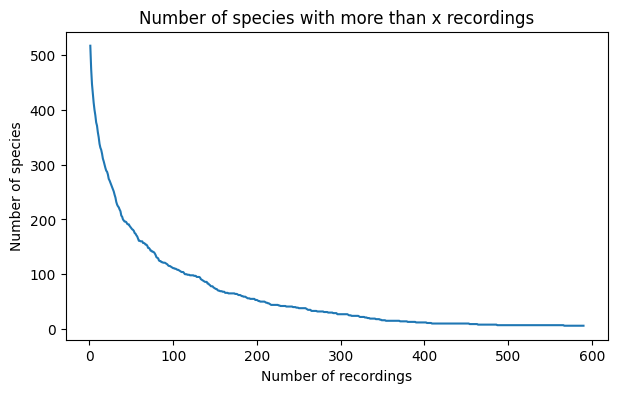

In [36]:
fig, ax  = plt.subplots(1, 1, figsize=(7, 4))

ax.set_title("Number of species with more than x recordings")
ax.set_xlabel("Number of recordings")
ax.set_ylabel("Number of species")
ax.plot(species_count_values.keys(), species_count_values.values())